Author: Ved Sharma  
Bio-Imaging Resource Center, The Rockefeller University  
June 15, 2023

In [1]:
import os
print (os.environ['CONDA_DEFAULT_ENV'])

F:\Mamba_envs\cellpose223GPU-jupyter


In [7]:
import os
dataFolder = r'F:\Projects\Uwe_TarakhovskyLab\20231005_NHA_imaging\H3K9me3'

file_names = os.listdir(dataFolder)
print('Number of files:', len(file_names))
print(*file_names[:10], sep='\n')

Number of files: 258
E6_D12_NHA_DAgno_DAPI-VP1488-H3K9me3-568_20x_1_setting1.czi
E6_D12_NHA_DAgno_DAPI-VP1488-H3K9me3-568_20x_1_setting1_maxP.tif
E6_D12_NHA_DAgno_DAPI-VP1488-H3K9me3-568_20x_1_setting1_maxP_DAPI.tif
E6_D12_NHA_DAgno_DAPI-VP1488-H3K9me3-568_20x_1_setting1_maxP_DAPI_Gauss1.tif
E6_D12_NHA_DAgno_DAPI-VP1488-H3K9me3-568_20x_1_setting1_maxP_H3K9me3.tif
E6_D12_NHA_DAgno_DAPI-VP1488-H3K9me3-568_20x_1_setting1_maxP_VP1.tif
E6_D12_NHA_DAgno_DAPI-VP1488-H3K9me3-568_20x_2_setting1.czi
E6_D12_NHA_DAgno_DAPI-VP1488-H3K9me3-568_20x_2_setting1_maxP.tif
E6_D12_NHA_DAgno_DAPI-VP1488-H3K9me3-568_20x_2_setting1_maxP_DAPI.tif
E6_D12_NHA_DAgno_DAPI-VP1488-H3K9me3-568_20x_2_setting1_maxP_DAPI_Gauss1.tif


In [8]:
pattern = '_Gauss1.tif'
file_names_filtered = [file for file in file_names if file.endswith(pattern)]
print('Number of files:', len(file_names_filtered))
print(*file_names_filtered[:5], sep='\n')

Number of files: 43
E6_D12_NHA_DAgno_DAPI-VP1488-H3K9me3-568_20x_1_setting1_maxP_DAPI_Gauss1.tif
E6_D12_NHA_DAgno_DAPI-VP1488-H3K9me3-568_20x_2_setting1_maxP_DAPI_Gauss1.tif
E6_D12_NHA_DAgno_DAPI-VP1488-H3K9me3-568_20x_3_setting1_maxP_DAPI_Gauss1.tif
E6_D12_NHA_DAgno_DAPI-VP1488-H3K9me3-568_20x_4_setting1_maxP_DAPI_Gauss1.tif
E6_D12_NHA_DAgno_DAPI-VP1488-H3K9me3-568_20x_5_setting1_maxP_DAPI_Gauss1.tif


In [9]:
# RUN CELLPOSE

from cellpose import models, io

# DEFINE CELLPOSE MODEL
model = models.Cellpose(gpu=True, model_type='cyto2') #selet gpu True or False. Run on CPU if not in the GPU-enabled python environment

for filename in file_names_filtered:
    filepath = os.path.join(dataFolder, filename)
    img = io.imread(filepath)
    masks, flows, styles, diams = model.eval(img, diameter=40, channels=[0, 0])

    # save results as png
    io.save_masks(img, masks, flows, filepath, png=True, save_txt=False)

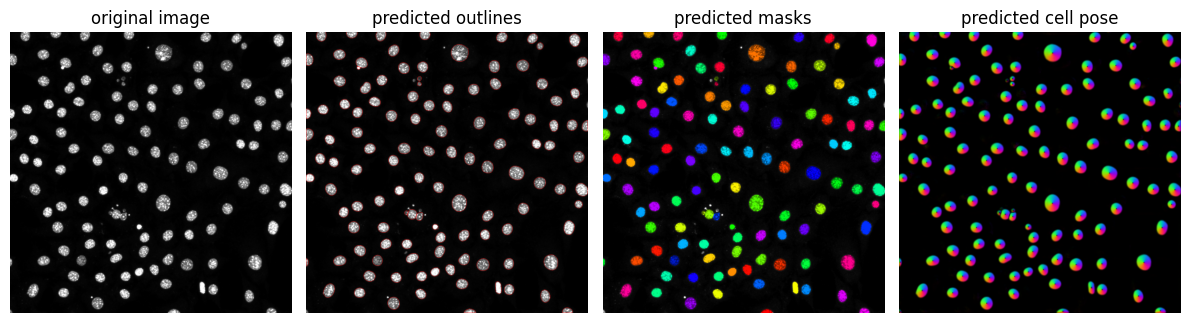

In [6]:
# DISPLAY RESULTS FOR THE LAST IMAGE
from cellpose import plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img, masks, flows[0], channels=[0, 0])
plt.tight_layout()
plt.show()